# Structure and Surprise Across Lyrics and Poetry

This notebook analyzes song lyrics and poetry using lexical, structural,
and phonetic features. We compare albums across a structure–surprise
space and examine how sound-based structure operates differently in poetry.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
ALBUM_YEARS = {
    # Lana Del Rey albums
    "aka_lizzy_grant": 2010,
    "born_to_die": 2012,
    "ultraviolence": 2014,
    "honeymoon": 2015,
    "lust_for_life": 2017,
    "nfr": 2019,
    "chemtrails_over_the_country_club": 2021,
    "blue_banisters": 2021,
    "did_you_know_ocean_blvd": 2023,
    "newest": 2026,

    # Tove Lo Albums
    "queen_of_the_clouds": 2014,
    "lady_wood": 2016,
    "blue_lips": 2017,
    "sunshine_kitty": 2019,
    "dirt_femme": 2022,

    # Stevie Nicks/Fleetwood Mac Albums
    "rumours": 1977,
    "say_you_will": 2003,
    "street_angel": 1994,

    "aurora": 2023,

    # Halsey Albums
    "badlands": 2015,
    "hopeless_fountain_kingdom": 2017,
    "manic": 2020,
    "if_i_cant_have_love_i_want_power": 2021,
    "the_great_impersonator": 2024,

    # Glass Animals Albums
    "zaba": 2014,
    "how_to_be_a_human_being": 2016,
    "dreamland": 2020,
    "ilysfm": 2024,

    # Marina Albums
    "the_family_jewels": 2010,
    "electra_heart": 2012,
    "froot": 2015,
    "love+fear": 2019,
    "ancient_dreams_in_a_modern_land": 2021,
    "princess_of_power": 2025,

    # Cage the Elephant Albums
    'cage_the_elephant_alb': 2009,
    'thank_you_happy_birthday': 2011,
    'melophobia': 2013,
    'tell_me_im_pretty': 2015,
    'social_cues': 2019,
    'neon_pill': 2024,
    

    # Lorde Albums
    'pure-heroine': 2013,
    'melodrama': 2017,
    'solar-power': 2021,
    'virgin': 2025,

    # Poetry
    "ariel": 1965,
    "violet_bent_backwards_over_the_grass": 2020,
    "ocean_vuong_poetry": 2019,
    "my_poetry": 2025,
    "the_colossus": 1960,
    "terrance-hayes": 2014, # roughly, poems are compilations from different publications

    # Musicals
    "hamilton": 2015,
    
}


In [3]:


# 1) Load the features table (adjust path if needed)
df = pd.read_csv("../data/features/song_features.csv")

# 2) Define which "albums" are actually poetry collections
POETRY_ALBUMS = {
    "ariel",
    "violet_bent_backwards_over_the_grass",
    "my_poetry",
    "ocean_vuong_poetry",
    "the_colossus",
    "terrance-hayes",
}

LANA_ALBUMS = {
    "aka_lizzy_grant",
    "born_to_die",
    "ultraviolence",
    "honeymoon",
    "lust_for_life",
    "nfr",
    "chemtrails_over_the_country_club",
    "blue_banisters",
    "did_you_know_ocean_blvd",
    "newest",
}

TOVE_LO_ALBUMS = {
    "queen_of_the_clouds",
    "lady_wood",
    "blue_lips",
    "sunshine_kitty",
    "dirt_femme",
}

STEVIE_ALBUMS = {
    "rumours",
    "say_you_will",
    "street_angel",
    "aurora",
}

HALSEY_ALBUMS = {
    "badlands",
    "hopeless_fountain_kingdom",
    "manic",
    "if_i_cant_have_love_i_want_power",
    "the_great_impersonator",
}

GLASS_ANIMALS_ALBUMS = {
     "zaba",
    "how_to_be_a_human_being",
    "dreamland",
    "ilysfm",
}

MARINA_ALBUMS = {
    "the_family_jewels",
    "electra_heart",
    "froot",
    "love+fear",
    "ancient_dreams_in_a_modern_land",
    "princess_of_power",
}

CAGE_THE_ELEPHANT_ALBUMS = {
    'cage_the_elephant_alb',
    'thank_you_happy_birthday',
    'melophobia',
    'tell_me_im_pretty',
    'social_cues',
    'neon_pill',
}
    

LORDE_ALBUMS = {
    'pure-heroine',
    'melodrama',
    'solar-power',
    'virgin',
}

MUSICALS = {
    'hamilton',
}

# 3) Ensure a text_type column exists (no KeyError ever again)
df["text_type"] = df["album"].apply(lambda a: "poem" if a in POETRY_ALBUMS else "song")



def classify_artist(album):
    if album in LANA_ALBUMS:
        return "lana"
    elif album in TOVE_LO_ALBUMS:
        return "tove lo"
    elif album in STEVIE_ALBUMS:
        return "stevie"
    elif album in HALSEY_ALBUMS:
        return "halsey"
    elif album in GLASS_ANIMALS_ALBUMS:
        return "glass animals"
    elif album in MARINA_ALBUMS:
        return "marina"
    elif album in CAGE_THE_ELEPHANT_ALBUMS:
        return "cage the elephant"
    elif album in LORDE_ALBUMS:
        return "lorde"
    elif album in MUSICALS:
        return "musical"
    else:
        return "other"

df["artist_group"] = df["album"].apply(classify_artist)

df["year"] = df["album"].map(ALBUM_YEARS)
df[["album", "year"]].drop_duplicates().sort_values("year")


# 4) Clean splits you can reuse everywhere
df_songs = df[df["text_type"] == "song"].copy()
df_poems = df[df["text_type"] == "poem"].copy()

df_lana = df_songs[df_songs["artist_group"] == "lana"]
df_stevie = df_songs[df_songs["artist_group"] == "stevie"]
df_halsey = df_songs[df_songs["artist_group"] == "halsey"]
df_tove_lo = df_songs[df_songs["artist_group"] == "tove lo"]
df_marina = df_songs[df_songs["artist_group"] == "marina"]
df_glass_animals = df_songs[df_songs["artist_group"] == "glass animals"]
df_cage_the_elephant = df_songs[df_songs["artist_group"] == "cage the elephant"]
df_lorde = df_songs[df_songs["artist_group"] == "lorde"]
df_musical = df_songs[df_songs['artist_group'] == 'musical']



# 5) Quick sanity checks (so you can trust it)
print(df["text_type"].value_counts())
print("Song albums:", sorted(df_songs["album"].unique()))
print("Poetry collections:", sorted(df_poems["album"].unique()))


text_type
song    632
poem     93
Name: count, dtype: int64
Song albums: ['aka_lizzy_grant', 'ancient_dreams_in_a_modern_land', 'aurora', 'badlands', 'blue_banisters', 'blue_lips', 'born_to_die', 'cage_the_elephant_alb', 'chemtrails_over_the_country_club', 'did_you_know_ocean_blvd', 'dirt_femme', 'dreamland', 'electra_heart', 'froot', 'hamilton', 'honeymoon', 'hopeless_fountain_kingdom', 'how_to_be_a_human_being', 'if_i_cant_have_love_i_want_power', 'ilysfm', 'lady_wood', 'love+fear', 'lust_for_life', 'manic', 'melodrama', 'melophobia', 'neon_pill', 'newest', 'nfr', 'princess_of_power', 'pure-heroine', 'queen_of_the_clouds', 'rumours', 'say_you_will', 'social_cues', 'solar-power', 'street_angel', 'sunshine_kitty', 'tell_me_im_pretty', 'thank_you_happy_birthday', 'the_family_jewels', 'the_great_impersonator', 'ultraviolence', 'virgin', 'zaba']
Poetry collections: ['ariel', 'my_poetry', 'ocean_vuong_poetry', 'terrance-hayes', 'the_colossus', 'violet_bent_backwards_over_the_grass']


## Song Albums: Structure vs. Surprise

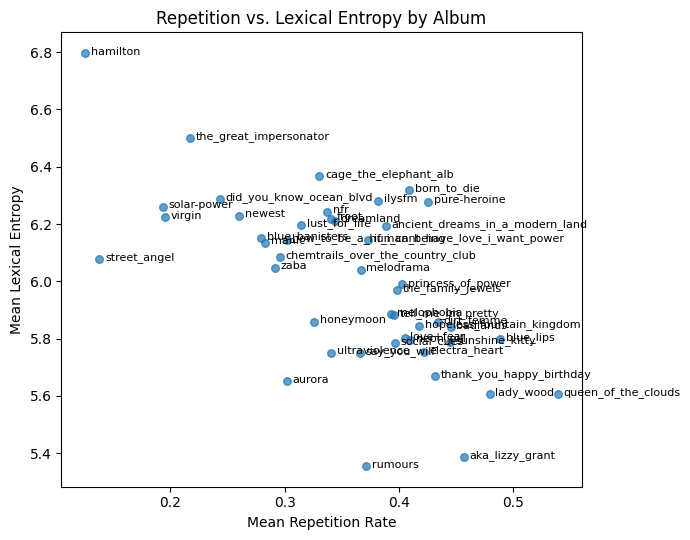

In [4]:
song_means = (
    df_songs
    .groupby("album")[["repetition_rate", "lexical_entropy"]]
    .mean()
    .reset_index()
)


plt.figure(figsize=(7, 5.5))
plt.scatter(
    song_means["repetition_rate"],
    song_means["lexical_entropy"],
    s=30,
    alpha=0.7,
)


for _, row in song_means.iterrows():
    plt.text(
        row["repetition_rate"] + 0.005,
        row["lexical_entropy"] + 0.005,
        row["album"],
        fontsize=8,
        ha="left",
        va="center"
    )

plt.xlabel("Mean Repetition Rate")
plt.ylabel("Mean Lexical Entropy")
plt.title("Repetition vs. Lexical Entropy by Album")
plt.tight_layout()
plt.show()


In [5]:
# pip install pronouncing

## Poetry: Phonetic Structure vs Surprise


In [6]:
import pronouncing
import re

def get_phonetic_ending(word):
    phones = pronouncing.phones_for_word(word.lower())
    if not phones:
        return None

    # Take first pronunciation
    phonemes = phones[0].split()

    # Get last stressed vowel onward
    for i in range(len(phonemes) - 1, -1, -1):
        if phonemes[i][-1].isdigit():  # stress marker
            return tuple(phonemes[i:])
    return tuple(phonemes[-2:])


C:\Users\mahli\AppData\Local\Programs\Python\Python313\Lib\site-packages\pronouncing\__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream


In [7]:
def phonetic_endings(text):
    endings = []
    for line in text.split("\n"):
        words = re.findall(r"\b\w+\b", line)
        if words:
            pe = get_phonetic_ending(words[-1])
            if pe:
                endings.append(pe)
    return endings


In [8]:
from collections import Counter

def phonetic_repetition_rate(endings):
    if not endings:
        return 0
    counts = Counter(endings)
    repeats = sum(c - 1 for c in counts.values() if c > 1)
    return repeats / len(endings)


In [9]:
import math

def phonetic_entropy(endings):
    if not endings:
        return 0
    counts = Counter(endings)
    total = sum(counts.values())
    probs = [c / total for c in counts.values()]
    return -sum(p * math.log2(p) for p in probs)


In [11]:


plt.figure(figsize=(6.5, 5.5))

# --- Songs (background) ---
songs = centroids[centroids["text_type"] == "song"]
plt.scatter(
    songs["phonetic_repetition_rate"],
    songs["phonetic_entropy"],
    s=50,
    alpha=0.5,
    color="tab:blue",
    label="song"
)

# --- Poems (foreground) ---
poems = centroids[centroids["text_type"] == "poem"]
plt.scatter(
    poems["phonetic_repetition_rate"],
    poems["phonetic_entropy"],
    s=70,
    marker="X",
    color="tab:orange",
    label="poem"
)

# Label ONLY poems
for _, row in poems.iterrows():
    plt.text(
        row["phonetic_repetition_rate"] + 0.01,
        row["phonetic_entropy"] + 0.02,
        row["album"],
        fontsize=7,
    )

# --- Label "hamilton" songs/points ---
hamilton = centroids[centroids["album"].str.lower() == "hamilton"]  # Case-insensitive match
for _, row in hamilton.iterrows():
    plt.text(
        row["phonetic_repetition_rate"] + 0.01,  # small offset so the label isn't on top of the point
        row["phonetic_entropy"] + 0.02,
        "hamilton",
        fontsize=7,
        color="tab:green"  # or any color to make it stand out!
    )

# Label the "ilysfm" album
album_to_label = "ilysfm"  # or the exact string in your DataFrame

row = centroids[(centroids["album"].str.lower() == album_to_label.lower()) & (centroids["text_type"] == "song")]
if not row.empty:
    row = row.iloc[0]
    plt.text(
        row["phonetic_repetition_rate"] + 0.01,
        row["phonetic_entropy"] - 0.02,
        row["album"],      # or a shorter display name if you want
        fontsize=8,
        color="mediumblue"
    )


# Only look at song albums
song_albums = centroids[centroids["text_type"] == "song"]

# Find the farthest right (max phonetic repetition)
rightmost = song_albums.loc[song_albums["phonetic_repetition_rate"].idxmax()]

# Find the farthest left (min phonetic repetition)
leftmost = song_albums.loc[song_albums["phonetic_repetition_rate"].idxmin()]

# Label them on the plot
plt.text(
    rightmost["phonetic_repetition_rate"] + 0.01,
    rightmost["phonetic_entropy"] - 0.02,
    rightmost["album"],
    fontsize=8,
    color="crimson"
)

plt.text(
    leftmost["phonetic_repetition_rate"] + 0.01,  # Adjust as needed
    leftmost["phonetic_entropy"] - 0.02,
    leftmost["album"],
    fontsize=8,
    color="darkviolet"
)

# Find the row (album) with the minimum phonetic entropy among songs
min_entropy_row = songs.loc[songs['phonetic_entropy'].idxmin()]

# Add a label at this point
plt.text(
    min_entropy_row['phonetic_repetition_rate'] + 0.01,
    min_entropy_row['phonetic_entropy'] - 0.02,  # adjust label position for clarity
    min_entropy_row['album'],
    fontsize=8,
    color='hotpink'
)


plt.xlabel("Mean Phonetic Repetition")
plt.ylabel("Mean Phonetic Entropy")
plt.title("Average Sound Structure Across Albums and Poetry")

plt.legend()
plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()


NameError: name 'centroids' is not defined

<Figure size 650x550 with 0 Axes>

In [ ]:
# !pip install seaborn


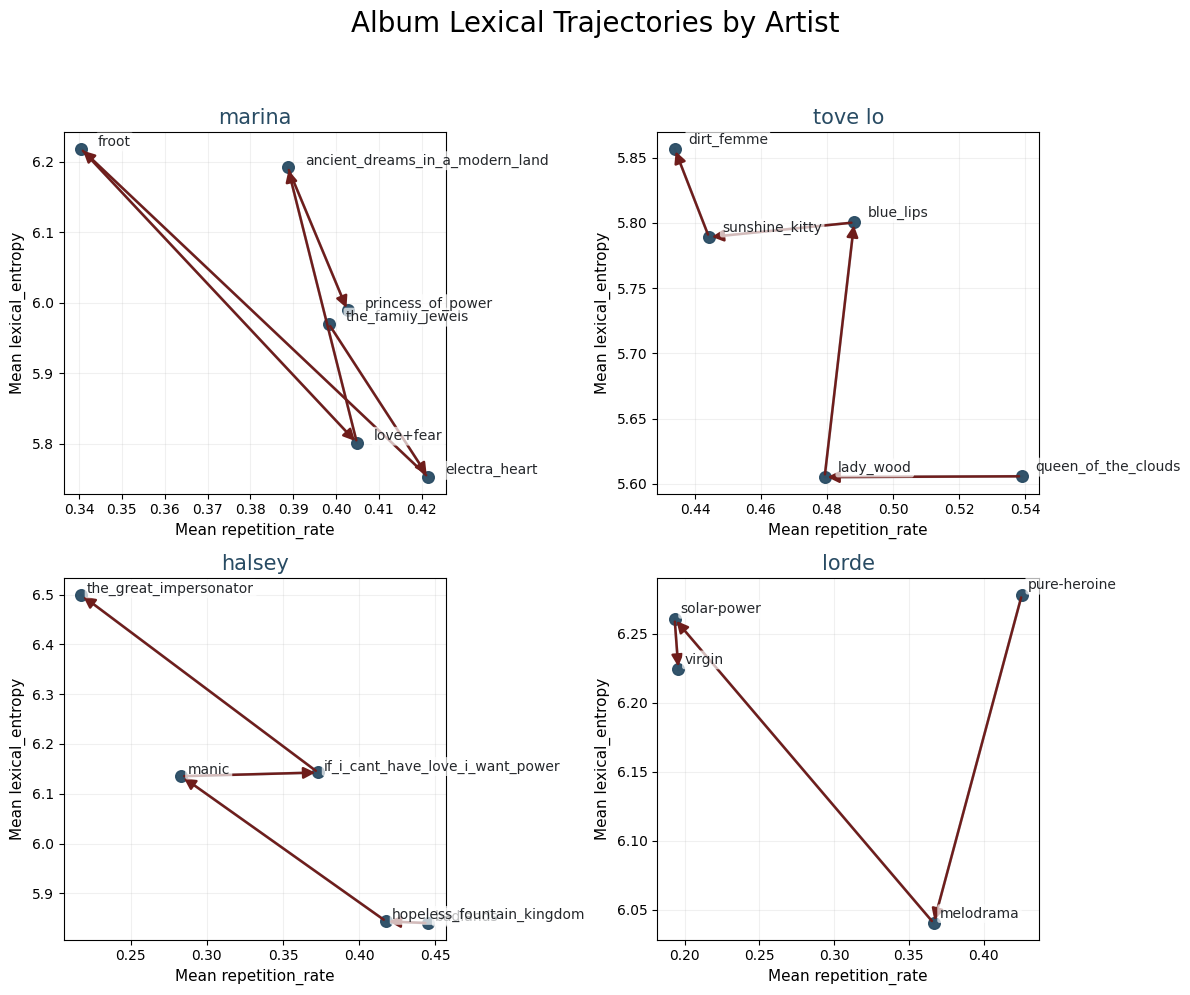

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_artist_album_trajectories(
    df,
    artists=None,
    x="repetition_rate",
    y="lexical_entropy",
    album_col="album",
    year_col="year",
    artist_col="artist_group",
    label_col="album",
    show_arrows=True,
    annotate=True,
    ncols=2,
    figsize=(12, 5)
):
    if artists is None:
        artists = sorted(df[artist_col].dropna().unique())

    n = len(artists)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(figsize[0], figsize[1] * nrows), squeeze=False)

    for idx, artist in enumerate(artists):
        ax = axes[idx // ncols, idx % ncols]
        dfa = df[df[artist_col] == artist].dropna(subset=[album_col, year_col, x, y]).copy()
        dfa[year_col] = pd.to_numeric(dfa[year_col], errors="coerce")
        dfa = dfa.dropna(subset=[year_col])

        album_means = (
            dfa.groupby([album_col, year_col])[[x, y]]
                .mean()
                .reset_index()
                .sort_values([year_col, album_col])
        )

        # Album points (bigger, colored)
        ax.scatter(album_means[x], album_means[y], s=70, alpha=0.95, color="#284b63", zorder=5)

        # Connecting path (faint so arrows stand out)
        ax.plot(album_means[x].values, album_means[y].values, alpha=0.3, color="#284b63", lw=2, zorder=1)

        # **Arrows**
        if show_arrows and len(album_means) >= 2:
            for i in range(len(album_means) - 1):
                x0, y0 = album_means.iloc[i][x], album_means.iloc[i][y]
                x1, y1 = album_means.iloc[i+1][x], album_means.iloc[i+1][y]
             
                ax.annotate(
                    "",
                    xy=(x1, y1),
                    xytext=(x0, y0),
                    arrowprops=dict(
                        arrowstyle="-|>",
                        color="#6f1d1b",
                        lw=1.8,
                        mutation_scale=17
                    ),
                    zorder=10
                )

        ax.grid(True, which="both", alpha=0.18)  # alpha controls grid faintness


        # **Labels**
        if annotate:
            for _, r in album_means.iterrows():
                ax.text(
                    r[x] + 0.004, r[y] + 0.004,
                    f"{r[label_col]}",
                    fontsize=10, color="#24272B",
                    bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round,pad=0.17"),
                    zorder=20
                )

        ax.set_title(artist, fontsize=15, color="#284b63")
        ax.set_xlabel(f"Mean {x}", fontsize=11)
        ax.set_ylabel(f"Mean {y}", fontsize=11)

    for j in range(idx + 1, nrows * ncols):
        fig.delaxes(axes[j // ncols, j % ncols])

    plt.suptitle("Album Lexical Trajectories by Artist", fontsize=20, y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()


# Usage:
plot_all_artist_album_trajectories(df, artists=["marina", "tove lo", 'halsey', 'lorde'])
# If you omit 'artists', it will plot for all artist_groups in the DataFrame.


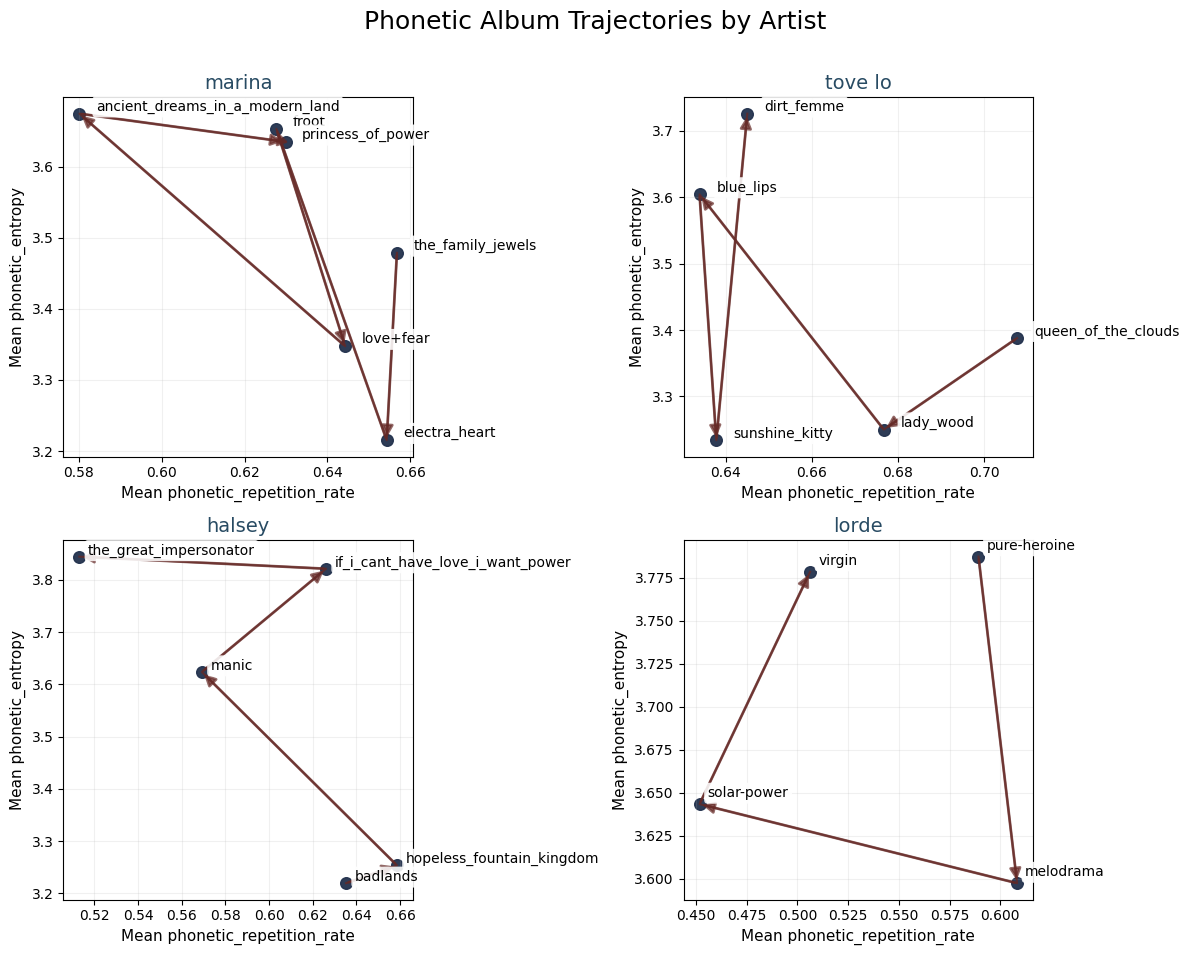

In [13]:
def plot_artist_trajectories(df, artists, x="phonetic_repetition_rate", y="phonetic_entropy"):
    import matplotlib.pyplot as plt

    n = len(artists)
    ncols = 2
    nrows = (n + 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(12,10))
    axes = axes.flatten()

    for idx, artist in enumerate(artists):
        ax = axes[idx]
        df_artist = df[df["artist_group"] == artist].dropna(subset=[x, y, "album", "year"])
        df_artist["year"] = pd.to_numeric(df_artist["year"], errors="coerce")
        df_artist = df_artist.dropna(subset=["year"])
        album_means = (
            df_artist.groupby(["album", "year"])[[x, y]]
            .mean()
            .reset_index()
            .sort_values(["year", "album"])
        )
        ax.scatter(album_means[x], album_means[y], s=70, alpha=0.95, color="#22314D")
        ax.plot(album_means[x], album_means[y], alpha=0.8, color="#652926")



        
        # Arrows
        for i in range(len(album_means) - 1):
            x0, y0 = album_means.iloc[i][x], album_means.iloc[i][y]
            x1, y1 = album_means.iloc[i+1][x], album_means.iloc[i+1][y]
            ax.annotate(
                "",
                xy=(x1, y1), xytext=(x0, y0),
                arrowprops=dict(arrowstyle="-|>", lw=2, mutation_scale=17, alpha=0.7, color="#652926"),
                zorder=10,
            )

        ax.grid(True, which="both", alpha=0.18)  # alpha controls grid faintness

        # Labels
        for _, r in album_means.iterrows():
            ax.text(
                r[x] + 0.004, r[y] + 0.004,
                f"{r['album']}",  # Just the album name, no year
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.88, boxstyle='round,pad=0.25'),  # white background!
                zorder=20
            )

        ax.set_title(artist, fontsize=14, color="#284b63")
        ax.set_xlabel(f"Mean {x}", fontsize=11)
        ax.set_ylabel(f"Mean {y}", fontsize=11)

            


    # Remove unused subplots
    for i in range(len(artists), len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle("Phonetic Album Trajectories by Artist", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    
    plt.show()


artist_list = ["marina", "tove lo", "halsey", "lorde"]
plot_artist_trajectories(df, artist_list, x="phonetic_repetition_rate", y="phonetic_entropy")


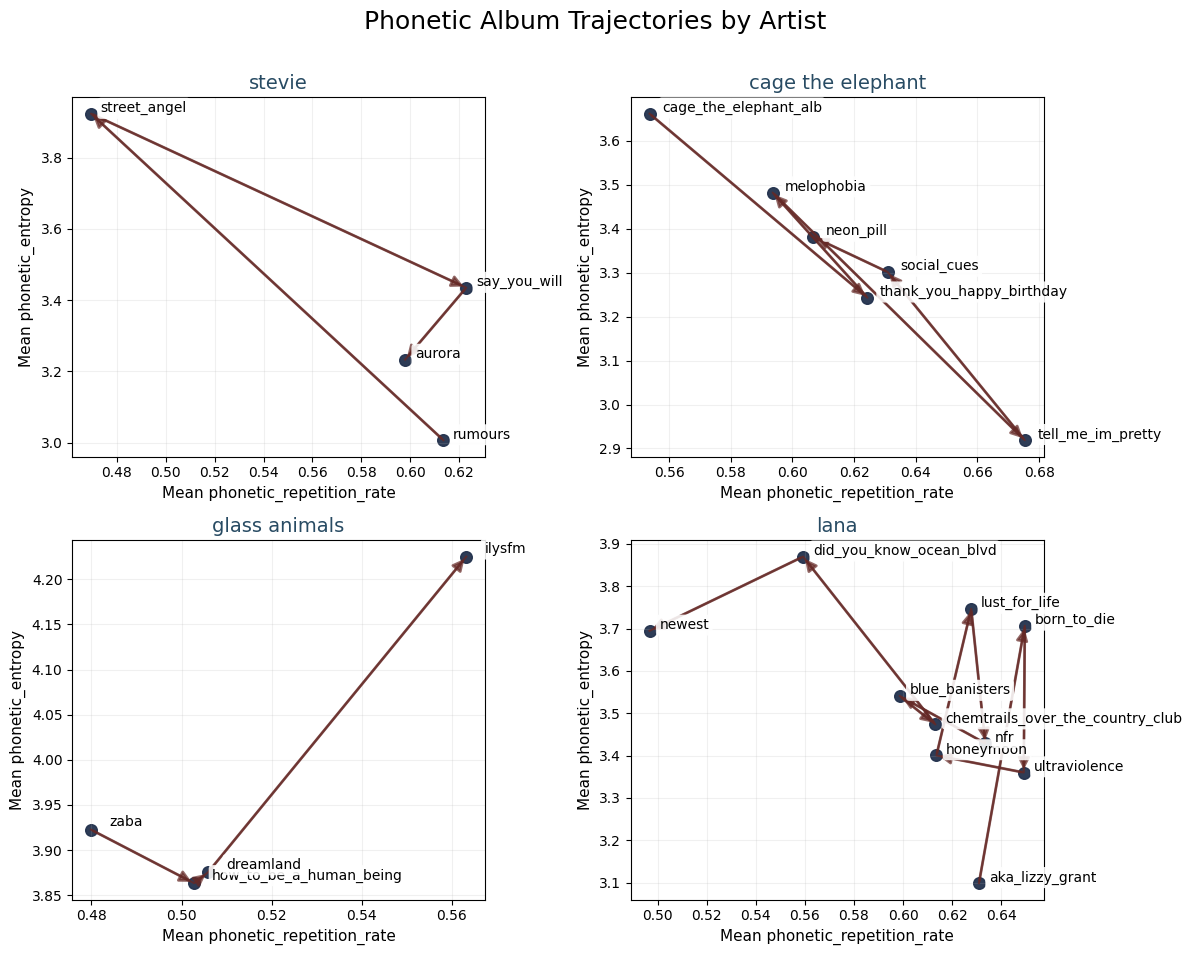

In [14]:
def plot_artist_trajectories(df, artists, x="phonetic_repetition_rate", y="phonetic_entropy"):
    import matplotlib.pyplot as plt

    n = len(artists)
    ncols = 2
    nrows = (n + 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(12,10))
    axes = axes.flatten()

    for idx, artist in enumerate(artists):
        ax = axes[idx]
        df_artist = df[df["artist_group"] == artist].dropna(subset=[x, y, "album", "year"])
        df_artist["year"] = pd.to_numeric(df_artist["year"], errors="coerce")
        df_artist = df_artist.dropna(subset=["year"])
        album_means = (
            df_artist.groupby(["album", "year"])[[x, y]]
            .mean()
            .reset_index()
            .sort_values(["year", "album"])
        )
        ax.scatter(album_means[x], album_means[y], s=70, alpha=0.95, color="#22314D")
        ax.plot(album_means[x], album_means[y], alpha=0.8, color="#652926")



        
        # Arrows
        for i in range(len(album_means) - 1):
            x0, y0 = album_means.iloc[i][x], album_means.iloc[i][y]
            x1, y1 = album_means.iloc[i+1][x], album_means.iloc[i+1][y]
            ax.annotate(
                "",
                xy=(x1, y1), xytext=(x0, y0),
                arrowprops=dict(arrowstyle="-|>", lw=2, mutation_scale=17, alpha=0.7, color="#652926"),
                zorder=10,
            )

        ax.grid(True, which="both", alpha=0.18)  # alpha controls grid faintness

        # Labels
        for _, r in album_means.iterrows():
            ax.text(
                r[x] + 0.004, r[y] + 0.004,
                f"{r['album']}",  # Just the album name, no year
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.88, boxstyle='round,pad=0.25'),  # white background!
                zorder=20
            )

        ax.set_title(artist, fontsize=14, color="#284b63")
        ax.set_xlabel(f"Mean {x}", fontsize=11)
        ax.set_ylabel(f"Mean {y}", fontsize=11)

            


    # Remove unused subplots
    for i in range(len(artists), len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle("Phonetic Album Trajectories by Artist", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    
    plt.show()


artist_list = ["stevie", "cage the elephant", "glass animals", "lana"]
plot_artist_trajectories(df, artist_list, x="phonetic_repetition_rate", y="phonetic_entropy")


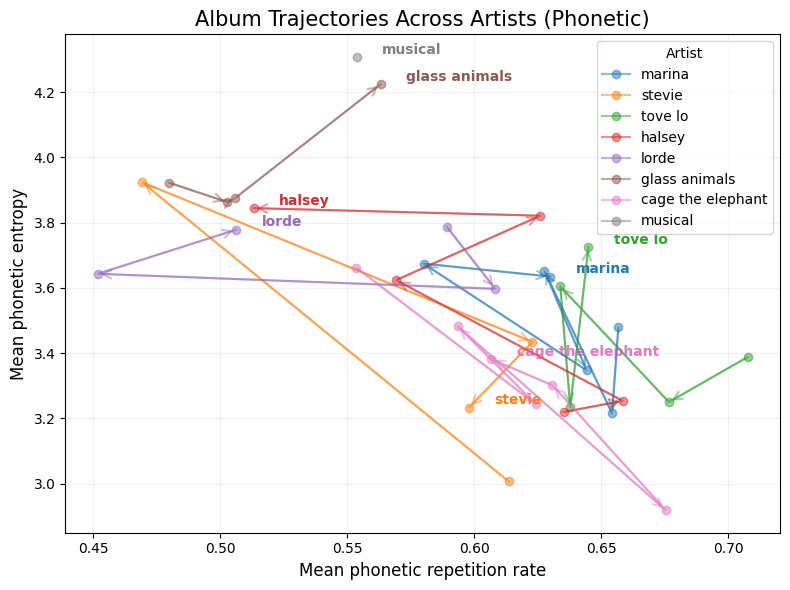

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_overlapped_trajectories_with_arrows(df, artists, x="phonetic_repetition_rate", y="phonetic_entropy"):
    plt.figure(figsize=(8, 6))
    color_map = plt.get_cmap("tab10")
    artist_colors = {artist: color_map(i) for i, artist in enumerate(artists)}

    for i, artist in enumerate(artists):
        df_artist = df[df["artist_group"] == artist].dropna(subset=[x, y, "album", "year"])
        df_artist["year"] = pd.to_numeric(df_artist["year"], errors="coerce")
        df_artist = df_artist.dropna(subset=["year"])
        album_means = (
            df_artist.groupby(["album", "year"])[[x, y]]
            .mean()
            .reset_index()
            .sort_values(["year", "album"])
        )
        # Draw lines and arrows for the trajectory
        for j in range(len(album_means) - 1):
            x0, y0 = album_means.iloc[j][x], album_means.iloc[j][y]
            x1, y1 = album_means.iloc[j+1][x], album_means.iloc[j+1][y]
            plt.annotate(
                "",
                xy=(x1, y1), xytext=(x0, y0),
                arrowprops=dict(
                    arrowstyle="->",
                    color=artist_colors[artist],
                    lw=1.5,
                    alpha=0.45,
                    mutation_scale=15
                ),
                zorder=10
            )
        # Draw points
        plt.plot(album_means[x], album_means[y],
                 marker="o", markersize=6, lw=1.5,
                 color=artist_colors[artist], alpha=0.5,
                 label=artist)

        if not album_means.empty:
            plt.text(
                album_means[x].iloc[-1] + 0.01,
                album_means[y].iloc[-1] + 0.01,
                artist, fontsize=10,
                color=artist_colors[artist], weight="bold", alpha=0.99
            )
       

    plt.xlabel("Mean phonetic repetition rate", fontsize=12)
    plt.ylabel("Mean phonetic entropy", fontsize=12)
    plt.title("Album Trajectories Across Artists (Phonetic)", fontsize=15)
    plt.grid(True, which="both", alpha=0.18)
    plt.legend(title="Artist", fontsize=10)
    plt.tight_layout()
    plt.show()

# Example usage:
artist_list = ["marina", 'stevie', "tove lo", "halsey", "lorde", "glass animals", 'cage the elephant', 'musical']
plot_overlapped_trajectories_with_arrows(df, artist_list, x="phonetic_repetition_rate", y="phonetic_entropy")


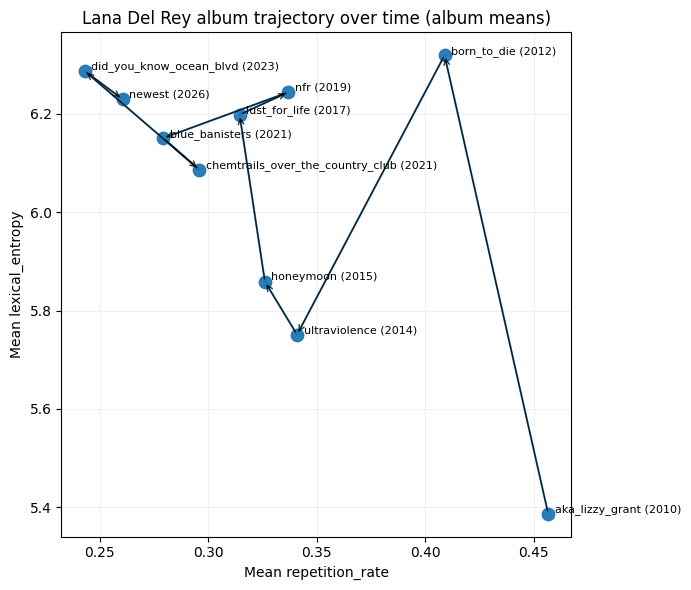

,album,year
0,aka_lizzy_grant,2010
2,born_to_die,2012
9,ultraviolence,2014
5,honeymoon,2015
6,lust_for_life,2017
8,nfr,2019
1,blue_banisters,2021
3,chemtrails_over_the_country_club,2021
4,did_you_know_ocean_blvd,2023
7,newest,2026


In [17]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_lana_album_trajectory(df,
                              x="repetition_rate",
                              y="lexical_entropy",
                              album_col="album",
                              year_col="year",
                              artist_col="artist_group",
                              label_col="album",
                              show_arrows=True,
                              annotate=True):

    lana = df.copy()
    lana = lana[lana[artist_col] == "lana"].dropna(subset=[album_col, year_col, x, y])

    lana[year_col] = pd.to_numeric(lana[year_col], errors="coerce")
    lana = lana.dropna(subset=[year_col])

    # album-level means (one point per album)
    album_means = (
        lana.groupby([album_col, year_col])[[x, y]]
            .mean()
            .reset_index()
            .sort_values([year_col, album_col])
    )

    plt.figure(figsize=(7, 6))

    # points + connecting path
    plt.scatter(album_means[x], album_means[y], s=80, alpha=0.95)
    plt.plot(album_means[x].values, album_means[y].values, alpha=0.8)

    # arrows for direction
    if show_arrows and len(album_means) >= 2:
        for i in range(len(album_means) - 1):
            x0, y0 = album_means.iloc[i][x], album_means.iloc[i][y]
            x1, y1 = album_means.iloc[i+1][x], album_means.iloc[i+1][y]
            plt.annotate("", xy=(x1, y1), xytext=(x0, y0),
                         arrowprops=dict(arrowstyle="->", lw=1, alpha=0.8))
    plt.grid(True, which="both", alpha=0.18)
    # labels
    if annotate:
        for _, r in album_means.iterrows():
            yr = int(r[year_col])
            plt.text(r[x] + 0.003, r[y] + 0.003, f"{r[label_col]} ({yr})", fontsize=8)

    plt.xlabel(f"Mean {x}")
    plt.ylabel(f"Mean {y}")
    plt.title("Lana Del Rey album trajectory over time (album means)")
    plt.tight_layout()
    plt.show()

    return album_means

lana_album_means = plot_lana_album_trajectory(df)
lana_album_means[["album", "year"]]



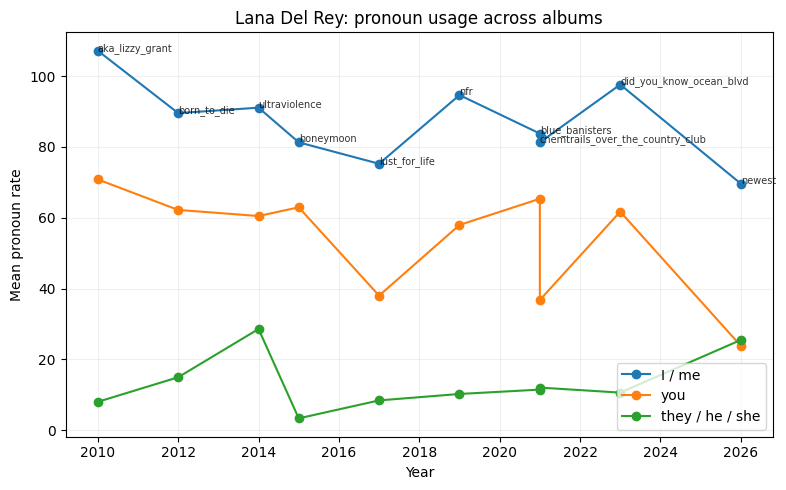

,album,year,first_person_rate,second_person_rate,third_person_rate
0,aka_lizzy_grant,2010,107.168077,70.827231,8.037923
2,born_to_die,2012,89.553733,62.215133,14.972067
9,ultraviolence,2014,91.086571,60.496571,28.596643
5,honeymoon,2015,81.301286,62.954500,3.374071
6,lust_for_life,2017,75.247375,38.017313,8.438125
8,nfr,2019,94.642692,57.973077,10.257462
1,blue_banisters,2021,83.780214,65.364643,11.485071
3,chemtrails_over_the_country_club,2021,81.291364,36.794818,12.055909
4,did_you_know_ocean_blvd,2023,97.612813,61.726375,10.639750
7,newest,2026,69.638750,23.867500,25.495500


In [18]:
def plot_lana_pronouns_over_time(df):
    lana = (
        df[df["artist_group"] == "lana"]
        .dropna(subset=[
            "album", "year",
            "first_person_rate",
            "second_person_rate",
            "third_person_rate"
        ])
        .copy()
    )

    lana["year"] = pd.to_numeric(lana["year"], errors="coerce")
    lana = lana.dropna(subset=["year"])

    album_means = (
        lana.groupby(["album", "year"])[
            ["first_person_rate", "second_person_rate", "third_person_rate"]
        ]
        .mean()
        .reset_index()
        .sort_values(["year", "album"])
    )

    plt.figure(figsize=(8, 5))

    plt.plot(album_means["year"], album_means["first_person_rate"], marker="o", label="I / me")
    plt.plot(album_means["year"], album_means["second_person_rate"], marker="o", label="you")
    plt.plot(album_means["year"], album_means["third_person_rate"], marker="o", label="they / he / she")

    for _, r in album_means.iterrows():
        plt.text(r["year"], r["first_person_rate"], r["album"], fontsize=7, alpha=0.8)
    plt.grid(True, which="both", alpha=0.18)
    plt.xlabel("Year")
    plt.ylabel("Mean pronoun rate")
    plt.title("Lana Del Rey: pronoun usage across albums")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return album_means

plot_lana_pronouns_over_time(df)


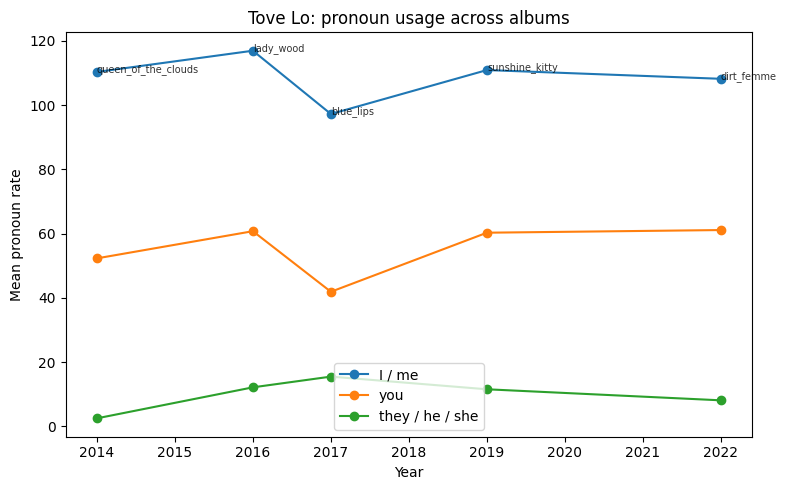

,album,year,first_person_rate,second_person_rate,third_person_rate
3,queen_of_the_clouds,2014,110.299933,52.273800,2.475467
2,lady_wood,2016,116.914818,60.732364,12.126182
0,blue_lips,2017,97.212308,41.874692,15.466385
4,sunshine_kitty,2019,110.892706,60.263647,11.521824
1,dirt_femme,2022,108.170800,61.089733,8.080000


In [165]:
def plot_tove_lo_pronouns_over_time(df):
    tove_lo = (
        df[df["artist_group"] == "tove lo"]
        .dropna(subset=[
            "album", "year",
            "first_person_rate",
            "second_person_rate",
            "third_person_rate"
        ])
        .copy()
    )

    tove_lo["year"] = pd.to_numeric(tove_lo["year"], errors="coerce")
    tove_lo = tove_lo.dropna(subset=["year"])

    album_means = (
        tove_lo.groupby(["album", "year"])[
            ["first_person_rate", "second_person_rate", "third_person_rate"]
        ]
        .mean()
        .reset_index()
        .sort_values(["year", "album"])
    )

    plt.figure(figsize=(8, 5))

    plt.plot(album_means["year"], album_means["first_person_rate"], marker="o", label="I / me")
    plt.plot(album_means["year"], album_means["second_person_rate"], marker="o", label="you")
    plt.plot(album_means["year"], album_means["third_person_rate"], marker="o", label="they / he / she")

    for _, r in album_means.iterrows():
        plt.text(r["year"], r["first_person_rate"], r["album"], fontsize=7, alpha=0.8)

    plt.xlabel("Year")
    plt.ylabel("Mean pronoun rate")
    plt.title("Tove Lo: pronoun usage across albums")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return album_means

plot_tove_lo_pronouns_over_time(df)


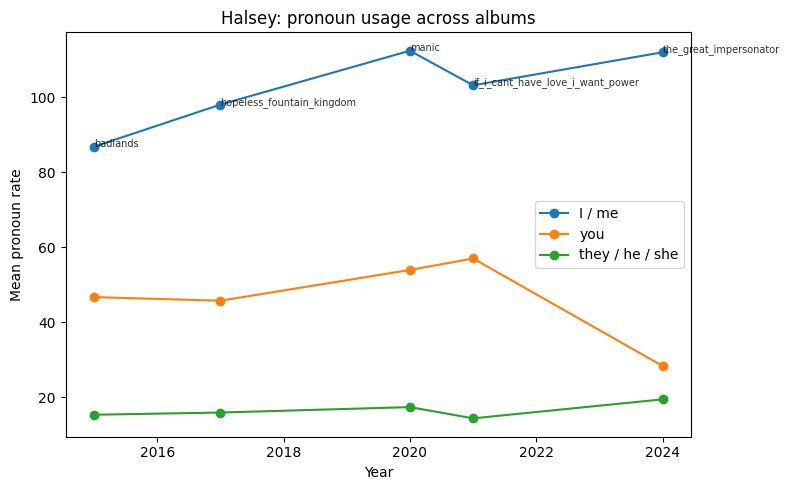

,album,year,first_person_rate,second_person_rate,third_person_rate
0,badlands,2015,86.801063,46.694250,15.345250
1,hopeless_fountain_kingdom,2017,98.001437,45.736937,15.931313
3,manic,2020,112.362278,53.936500,17.380056
2,if_i_cant_have_love_i_want_power,2021,103.144429,56.987357,14.385357
4,the_great_impersonator,2024,111.951611,28.336833,19.449556


In [157]:
def plot_halsey_pronouns_over_time(df):
    halsey = (
        df[df["artist_group"] == "halsey"]
        .dropna(subset=[
            "album", "year",
            "first_person_rate",
            "second_person_rate",
            "third_person_rate"
        ])
        .copy()
    )

    halsey["year"] = pd.to_numeric(halsey["year"], errors="coerce")
    halsey = halsey.dropna(subset=["year"])

    album_means = (
        halsey.groupby(["album", "year"])[
            ["first_person_rate", "second_person_rate", "third_person_rate"]
        ]
        .mean()
        .reset_index()
        .sort_values(["year", "album"])
    )

    plt.figure(figsize=(8, 5))

    plt.plot(album_means["year"], album_means["first_person_rate"], marker="o", label="I / me")
    plt.plot(album_means["year"], album_means["second_person_rate"], marker="o", label="you")
    plt.plot(album_means["year"], album_means["third_person_rate"], marker="o", label="they / he / she")

    for _, r in album_means.iterrows():
        plt.text(r["year"], r["first_person_rate"], r["album"], fontsize=7, alpha=0.8)

    plt.xlabel("Year")
    plt.ylabel("Mean pronoun rate")
    plt.title("Halsey: pronoun usage across albums")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return album_means

plot_halsey_pronouns_over_time(df)


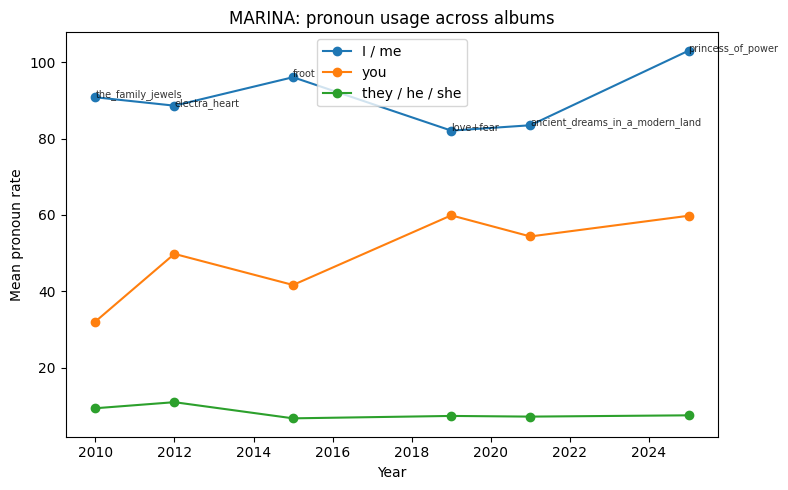

,album,year,first_person_rate,second_person_rate,third_person_rate
5,the_family_jewels,2010,90.835500,32.037143,9.324929
1,electra_heart,2012,88.632053,49.784684,10.918211
2,froot,2015,96.089333,41.635333,6.680917
3,love+fear,2019,82.092938,59.884188,7.311250
0,ancient_dreams_in_a_modern_land,2021,83.496231,54.352769,7.134769
4,princess_of_power,2025,103.034706,59.775059,7.472176


In [158]:
def plot_marina_pronouns_over_time(df):
    marina = (
        df[df["artist_group"] == "marina"]
        .dropna(subset=[
            "album", "year",
            "first_person_rate",
            "second_person_rate",
            "third_person_rate"
        ])
        .copy()
    )

    marina["year"] = pd.to_numeric(marina["year"], errors="coerce")
    marina = marina.dropna(subset=["year"])

    album_means = (
        marina.groupby(["album", "year"])[
            ["first_person_rate", "second_person_rate", "third_person_rate"]
        ]
        .mean()
        .reset_index()
        .sort_values(["year", "album"])
    )

    plt.figure(figsize=(8, 5))

    plt.plot(album_means["year"], album_means["first_person_rate"], marker="o", label="I / me")
    plt.plot(album_means["year"], album_means["second_person_rate"], marker="o", label="you")
    plt.plot(album_means["year"], album_means["third_person_rate"], marker="o", label="they / he / she")

    for _, r in album_means.iterrows():
        plt.text(r["year"], r["first_person_rate"], r["album"], fontsize=7, alpha=0.8)

    plt.xlabel("Year")
    plt.ylabel("Mean pronoun rate")
    plt.title("MARINA: pronoun usage across albums")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return album_means

plot_marina_pronouns_over_time(df)


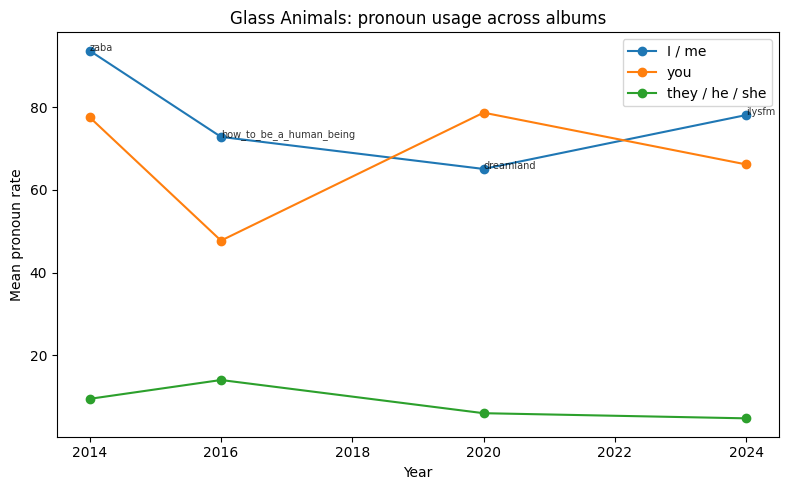

,album,year,first_person_rate,second_person_rate,third_person_rate
3,zaba,2014,93.632444,77.538556,9.504667
1,how_to_be_a_human_being,2016,72.810727,47.739545,14.056273
0,dreamland,2020,65.058923,78.664769,6.034538
2,ilysfm,2024,78.083900,66.155700,4.791500


In [159]:
def plot_glass_animals_pronouns_over_time(df):
    glass_animals = (
        df[df["artist_group"] == "glass animals"]
        .dropna(subset=[
            "album", "year",
            "first_person_rate",
            "second_person_rate",
            "third_person_rate"
        ])
        .copy()
    )

    glass_animals["year"] = pd.to_numeric(glass_animals["year"], errors="coerce")
    glass_animals = glass_animals.dropna(subset=["year"])

    album_means = (
        glass_animals.groupby(["album", "year"])[
            ["first_person_rate", "second_person_rate", "third_person_rate"]
        ]
        .mean()
        .reset_index()
        .sort_values(["year", "album"])
    )

    plt.figure(figsize=(8, 5))

    plt.plot(album_means["year"], album_means["first_person_rate"], marker="o", label="I / me")
    plt.plot(album_means["year"], album_means["second_person_rate"], marker="o", label="you")
    plt.plot(album_means["year"], album_means["third_person_rate"], marker="o", label="they / he / she")

    for _, r in album_means.iterrows():
        plt.text(r["year"], r["first_person_rate"], r["album"], fontsize=7, alpha=0.8)

    plt.xlabel("Year")
    plt.ylabel("Mean pronoun rate")
    plt.title("Glass Animals: pronoun usage across albums")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return album_means

plot_glass_animals_pronouns_over_time(df)


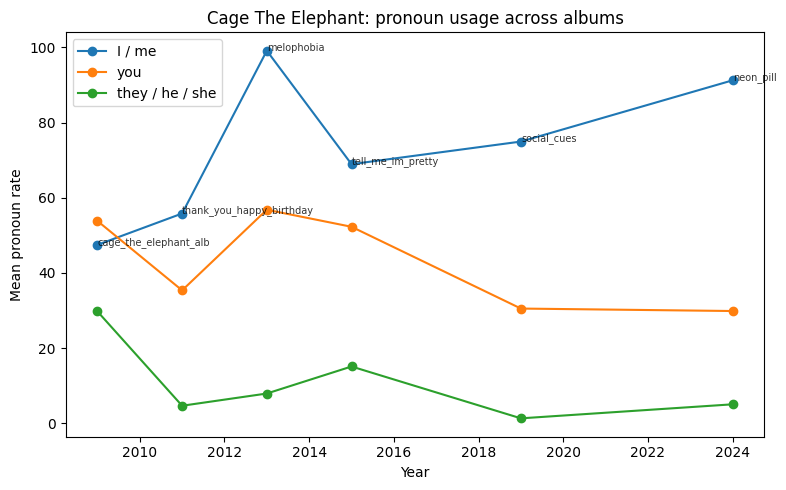

,album,year,first_person_rate,second_person_rate,third_person_rate
0,cage_the_elephant_alb,2009,47.475818,53.841091,29.766909
5,thank_you_happy_birthday,2011,55.817833,35.367667,4.661500
1,melophobia,2013,99.135300,56.816600,7.915300
4,tell_me_im_pretty,2015,68.943100,52.283100,15.107100
3,social_cues,2019,74.961615,30.523231,1.310846
2,neon_pill,2024,91.262250,29.868333,5.044083


In [160]:
def plot_cage_the_elephant_pronouns_over_time(df):
    cage_the_elephant = (
        df[df["artist_group"] == "cage the elephant"]
        .dropna(subset=[
            "album", "year",
            "first_person_rate",
            "second_person_rate",
            "third_person_rate"
        ])
        .copy()
    )

    cage_the_elephant["year"] = pd.to_numeric(cage_the_elephant["year"], errors="coerce")
    cage_the_elephant = cage_the_elephant.dropna(subset=["year"])

    album_means = (
        cage_the_elephant.groupby(["album", "year"])[
            ["first_person_rate", "second_person_rate", "third_person_rate"]
        ]
        .mean()
        .reset_index()
        .sort_values(["year", "album"])
    )

    plt.figure(figsize=(8, 5))

    plt.plot(album_means["year"], album_means["first_person_rate"], marker="o", label="I / me")
    plt.plot(album_means["year"], album_means["second_person_rate"], marker="o", label="you")
    plt.plot(album_means["year"], album_means["third_person_rate"], marker="o", label="they / he / she")

    for _, r in album_means.iterrows():
        plt.text(r["year"], r["first_person_rate"], r["album"], fontsize=7, alpha=0.8)

    plt.xlabel("Year")
    plt.ylabel("Mean pronoun rate")
    plt.title("Cage The Elephant: pronoun usage across albums")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return album_means

plot_cage_the_elephant_pronouns_over_time(df)


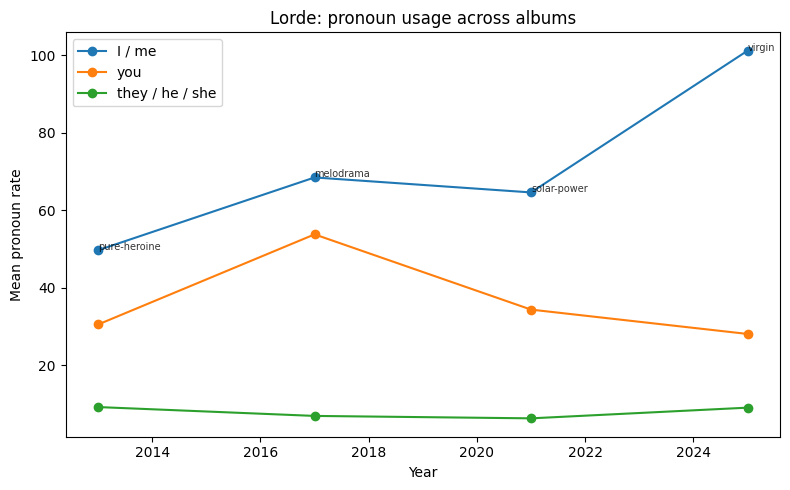

,album,year,first_person_rate,second_person_rate,third_person_rate
1,pure-heroine,2013,49.706100,30.536300,9.221400
0,melodrama,2017,68.485091,53.793182,6.936273
2,solar-power,2021,64.617167,34.374500,6.311417
3,virgin,2025,101.192545,28.091909,9.069455


In [20]:
def plot_lorde_pronouns_over_time(df):
    lorde = (
        df[df["artist_group"] == "lorde"]
        .dropna(subset=[
            "album", "year",
            "first_person_rate",
            "second_person_rate",
            "third_person_rate"
        ])
        .copy()
    )

    lorde["year"] = pd.to_numeric(lorde["year"], errors="coerce")
    lorde = lorde.dropna(subset=["year"])

    album_means = (
        lorde.groupby(["album", "year"])[
            ["first_person_rate", "second_person_rate", "third_person_rate"]
        ]
        .mean()
        .reset_index()
        .sort_values(["year", "album"])
    )

    plt.figure(figsize=(8, 5))

    plt.plot(album_means["year"], album_means["first_person_rate"], marker="o", label="I / me")
    plt.plot(album_means["year"], album_means["second_person_rate"], marker="o", label="you")
    plt.plot(album_means["year"], album_means["third_person_rate"], marker="o", label="they / he / she")

    for _, r in album_means.iterrows():
        plt.text(r["year"], r["first_person_rate"], r["album"], fontsize=7, alpha=0.8)

    plt.xlabel("Year")
    plt.ylabel("Mean pronoun rate")
    plt.title("Lorde: pronoun usage across albums")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return album_means

plot_lorde_pronouns_over_time(df)


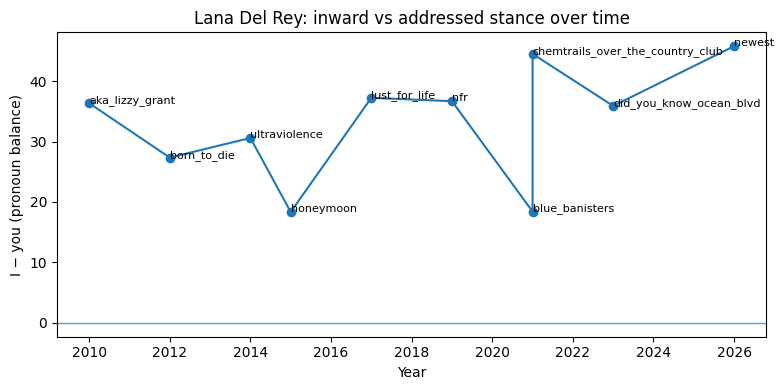

,album,year,first_person_rate,second_person_rate,third_person_rate,I_minus_you
0,aka_lizzy_grant,2010,107.168077,70.827231,8.037923,36.340846
2,born_to_die,2012,89.553733,62.215133,14.972067,27.338600
9,ultraviolence,2014,91.086571,60.496571,28.596643,30.590000
5,honeymoon,2015,81.301286,62.954500,3.374071,18.346786
6,lust_for_life,2017,75.247375,38.017313,8.438125,37.230063
8,nfr,2019,94.642692,57.973077,10.257462,36.669615
1,blue_banisters,2021,83.780214,65.364643,11.485071,18.415571
3,chemtrails_over_the_country_club,2021,81.291364,36.794818,12.055909,44.496545
4,did_you_know_ocean_blvd,2023,97.612813,61.726375,10.639750,35.886438
7,newest,2026,69.638750,23.867500,25.495500,45.771250


In [21]:
def plot_lana_pronoun_balance(df):
    lana = (
        df[df["artist_group"] == "lana"]
        .dropna(subset=[
            "album", "year",
            "first_person_rate",
            "second_person_rate",
            "third_person_rate"
        ])
        .copy()
    )

    lana["year"] = pd.to_numeric(lana["year"], errors="coerce")
    lana = lana.dropna(subset=["year"])

    album_means = (
        lana.groupby(["album", "year"])[
            ["first_person_rate", "second_person_rate", "third_person_rate"]
        ]
        .mean()
        .reset_index()
        .sort_values(["year", "album"])
    )

    # balance: inwardness minus address
    album_means["I_minus_you"] = (
        album_means["first_person_rate"]
        - album_means["second_person_rate"]
    )

    plt.figure(figsize=(8, 4))
    plt.plot(album_means["year"], album_means["I_minus_you"], marker="o")
    plt.axhline(0, lw=1, alpha=0.7)

    for _, r in album_means.iterrows():
        plt.text(r["year"], r["I_minus_you"], r["album"], fontsize=8)

    plt.xlabel("Year")
    plt.ylabel("I − you (pronoun balance)")
    plt.title("Lana Del Rey: inward vs addressed stance over time")
    plt.tight_layout()
    plt.show()

    return album_means

plot_lana_pronoun_balance(df)


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_pronoun_trajectory(df, album_name):
    # Filter for the album of interest
    album_df = df[df["album"] == album_name].copy()
    album_df = album_df.sort_values("track_number")

    plt.figure(figsize=(9, 5))
    
    plt.plot(album_df["track_number"], album_df["first_person_rate"], marker="o", label="I / me")
    plt.plot(album_df["track_number"], album_df["second_person_rate"], marker="o", label="you")
    plt.plot(album_df["track_number"], album_df["third_person_rate"], marker="o", label="they / he / she")

    plt.xticks(album_df["track_number"], album_df["song"], rotation=60, ha="right", fontsize=9)
    plt.xlabel("Track (in order)")
    plt.ylabel("Pronoun rate")
    plt.title(f"Pronoun Usage Across Tracks: {album_name}")
    plt.legend()
    plt.tight_layout()
    plt.grid(alpha=0.17)
    plt.show()


In [23]:
# Example: plot for Lorde’s "Melodrama"
plot_pronoun_trajectory(df, "melodrama")


KeyError: 'track_number'